In [173]:
import pandas as pd

In [174]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats
import statistics
import researchpy as rp
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [175]:
DataSet = pd.read_csv("DS1.csv")


In [176]:
DataSet

,Age,BMI,Months,FR,FOHR,Etiology
0,2.627778,13.502413,31,11.000000,0.308786,NTD
1,20.630556,26.226747,235,1.000000,0.376271,NTD
2,23.102778,40.169222,265,1.000000,0.316228,OTHER
3,9.905556,17.613899,10,16.000000,0.339401,IVH
4,5.716667,17.440715,66,0.000000,0.770581,IVH
...,...,...,...,...,...,...
79,15.000000,34.285176,177,7.932082,0.373760,NTD
80,2.000000,16.923338,23,13.857251,0.346880,OTHER
81,7.000000,18.877718,81,0.668971,0.423242,OTHER
82,7.000000,18.877718,81,1.003456,0.423242,OTHER


In [177]:
plot1 = px.scatter(DataSet, y = 'FR', x = 'FOHR')


In [238]:
SubPlot = make_subplots(rows = 1, cols = 4,
y_title= "Flow Rate", x_title="", subplot_titles= ("Age", "BMI", "Months", "FOHR")   
                     )

SubPlot.update_layout(showlegend = False, title = "", plot_bgcolor = 'white')

SubPlot.update_xaxes(showline = True, linecolor = 'black', linewidth = 1.5, ticks = "outside", showgrid = True, gridcolor = "lightgray", gridwidth = .5)
SubPlot.update_yaxes(showline = True, linecolor = 'black', linewidth = 1.5, ticks = "inside", showgrid = True, gridcolor = "lightgray", gridwidth = .5)

SubPlot.append_trace(go.Scatter(x = DataSet['Age'], y = DataSet["FR"], mode = "markers", marker = dict(color = "red")), row = 1, col = 1)
SubPlot.append_trace(go.Scatter(x = DataSet['BMI'], y = DataSet["FR"], mode = "markers", marker = dict(color = "green")), row = 1, col = 2)
SubPlot.append_trace(go.Scatter(x = DataSet['Months'], y = DataSet["FR"], mode = "markers", marker = dict(color = "orange")), row = 1, col = 3)
SubPlot.append_trace(go.Scatter(x = DataSet['FOHR'], y = DataSet["FR"], mode = "markers", marker = dict(color = "purple")), row = 1, col =4)

SubPlot.update_traces(marker = dict(size = 8, line = dict(width = .75, color = "black")))


In [234]:
Plot3D = px.scatter_3d(DataSet, x = "FOHR", y = "Age", z = "FR", color = "Etiology")
Plot3D.update_traces(marker_size = 5, opacity = 0.75)
Plot3D.show()

In [180]:
from sklearn import linear_model

In [236]:
figscat.update_traces(marker_size = 4)
figscat.show()

In [237]:
df = pd.read_csv("DS1.csv")


x = df[['FOHR','Age']]
y = df ["FR"]


In [182]:
regr = linear_model.LinearRegression()
regr.fit(x,y)

LinearRegression()

In [183]:
predictedFlow = regr.predict([[0.3, 20]])
print(predictedFlow)

[4.56051676]


/Users/jacobalhusseini/opt/anaconda3/envs/DataAnalytics/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [184]:
import plotly.express as px
from sklearn.decomposition import PCA

In [185]:
df = pd.read_csv("DS1.csv")
features = ["FR", "BMI", "FOHR", "Age", "Months"]

In [235]:
pca = PCA()
components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(5),
    color=df["Etiology"]
)
fig.update_traces(diagonal_visible=False, showupperhalf = False )
fig.update_traces(marker_size = 4.5
                  )
fig.show()


In [187]:
df = pd.read_csv("DS1.csv")
X = df[['Months', 'BMI', 'Age', 'FOHR', 'FR']]

pca = PCA(n_components=5)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color = df['Etiology'])
fig.show()

In [231]:
X = df[['Age', 'FR', 'FOHR', "BMI"]]

pca = PCA(n_components=4)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['Etiology'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.update_traces(marker_size = 4)
fig.show()

In [230]:
features = ['Months', 'BMI', 'FR', 'Age', 'FOHR']
X = df[features]

pca = PCA(n_components=5)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=df['Etiology'])

for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )
fig.update_traces(marker_size = 9)
fig.show()

In [228]:
df = pd.read_csv("DS1.csv")
###df = df.concatenate("Etiology")
figscat = px.scatter_matrix(df, color = "Etiology")
figscat.update_traces(showupperhalf = False, diagonal_visible = False)
figscat.update_traces(marker_size = 4)
figscat.show()

In [210]:
import plotly.io

In [211]:
plotly.io.write_image(figscat, 'scattermatrix.pdf', format = 'pdf')

In [209]:
plotly.image.save_as(figscat, 'scattermatrix.pdf')

NameError: name 'plotly' is not defined

In [1]:
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats
import statistics
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.decomposition import PCA
import time






st.title("CSFlow Computation")

with st.sidebar:
    options = st.multiselect(
        'How would you like to analyze the data?',
        ['PCA','Histogram','3D Scatter', 'PCA Matrix']
    )

st.subheader("Data Cleaning:")
uploaded_file = st.file_uploader("Insert CSV File Here!")
st.caption("After uploading your CSV, ensure the columns are labeled appropriately below.")
st.caption("Flow rate = FR, Age @ enrollment = Age, Months since shunt = Months, FOHR = FOHR, and Etiology labeled as either NTD, OTHER, or IVH")

df = pd.read_csv(uploaded_file)

st.dataframe(df)



if st.button("Process Data"):
    with st.spinner('Wait for it...'):
        time.sleep(1)
    st.success('Done!')




    if options == 'Histogram':
        #Histogram
        hist_values = px.histogram(
            df, x = "FR", 
            #nbins = 150,
            title = "Histogram of Flow Rate Distributions",
            color = "Etiology",
            #text_auto = True,
            #y_title = "Count",
            #x_title = "Flow Rate",
            )
        
        st.plotly_chart(hist_values)
        

    SubPlot = make_subplots(rows = 1, cols = 4,
    y_title= "Flow Rate", x_title="", subplot_titles= ("Age", "BMI", "Months", "FOHR")   
                    )

    SubPlot.update_layout(showlegend = False, title = "", plot_bgcolor = 'white')

    SubPlot.update_xaxes(showline = True, linecolor = 'black', linewidth = 1.5, ticks = "outside", showgrid = True, gridcolor = "lightgray", gridwidth = .5)
    SubPlot.update_yaxes(showline = True, linecolor = 'black', linewidth = 1.5, ticks = "inside", showgrid = True, gridcolor = "lightgray", gridwidth = .5)

    SubPlot.append_trace(go.Scatter(x = df['Age'], y = df["FR"], mode = "markers", marker = dict(color = "red")), row = 1, col = 1)
    SubPlot.append_trace(go.Scatter(x = df['BMI'], y = df["FR"], mode = "markers", marker = dict(color = "green")), row = 1, col = 2)
    SubPlot.append_trace(go.Scatter(x = df['Months'], y = df["FR"], mode = "markers", marker = dict(color = "orange")), row = 1, col = 3)
    SubPlot.append_trace(go.Scatter(x = df['FOHR'], y = df["FR"], mode = "markers", marker = dict(color = "purple")), row = 1, col =4)

    SubPlot.update_traces(marker = dict(size = 8, line = dict(width = .75, color = "black")))

    st.plotly_chart(SubPlot)



   
    Plot3D = px.scatter_3d(df, x = "FOHR", y = "Age", z = "FR", color = "Etiology")
    Plot3D.update_traces(marker_size = 5, opacity = 0.75)

    st.plotly_chart(Plot3D)



    pca = PCA()
    features = ["FR", "BMI", "FOHR", "Age", "Months"]
    components = pca.fit_transform(df[features])
    labels = {
        str(i): f"PC {i+1} ({var:.1f}%)"
        for i, var in enumerate(pca.explained_variance_ratio_ * 100)
    }

    fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(5),
        color=df["Etiology"]
    )
    fig.update_traces(diagonal_visible=False, showupperhalf = False )
    fig.update_traces(marker_size = 4.5
                )
    
    st.plotly_chart(fig)





2023-09-05 12:53:10.093 INFO    numexpr.utils: NumExpr defaulting to 8 threads.
2023-09-05 12:53:12.728 
  command:

    streamlit run /Users/jacobalhusseini/opt/anaconda3/envs/DataAnalytics/lib/python3.9/site-packages/ipykernel_launcher.py [ARGUMENTS]


ValueError: Invalid file path or buffer object type: <class 'NoneType'>

             Age        BMI      Months         FR       FOHR
count  84.000000  84.000000   84.000000  84.000000  84.000000
mean   10.440112  21.313393  106.107143   8.480109   0.372665
std     6.439124   6.319014   77.023861   8.876736   0.070257
min     0.000000  10.442164    0.000000   0.000000   0.287772
25%     5.565278  16.874470   42.750000   2.000000   0.332330
50%     9.126389  19.173804   91.500000   8.000000   0.354563
75%    15.286111  25.275490  166.500000  11.000000   0.394376
max    24.877778  40.169222  273.000000  54.000000   0.770581


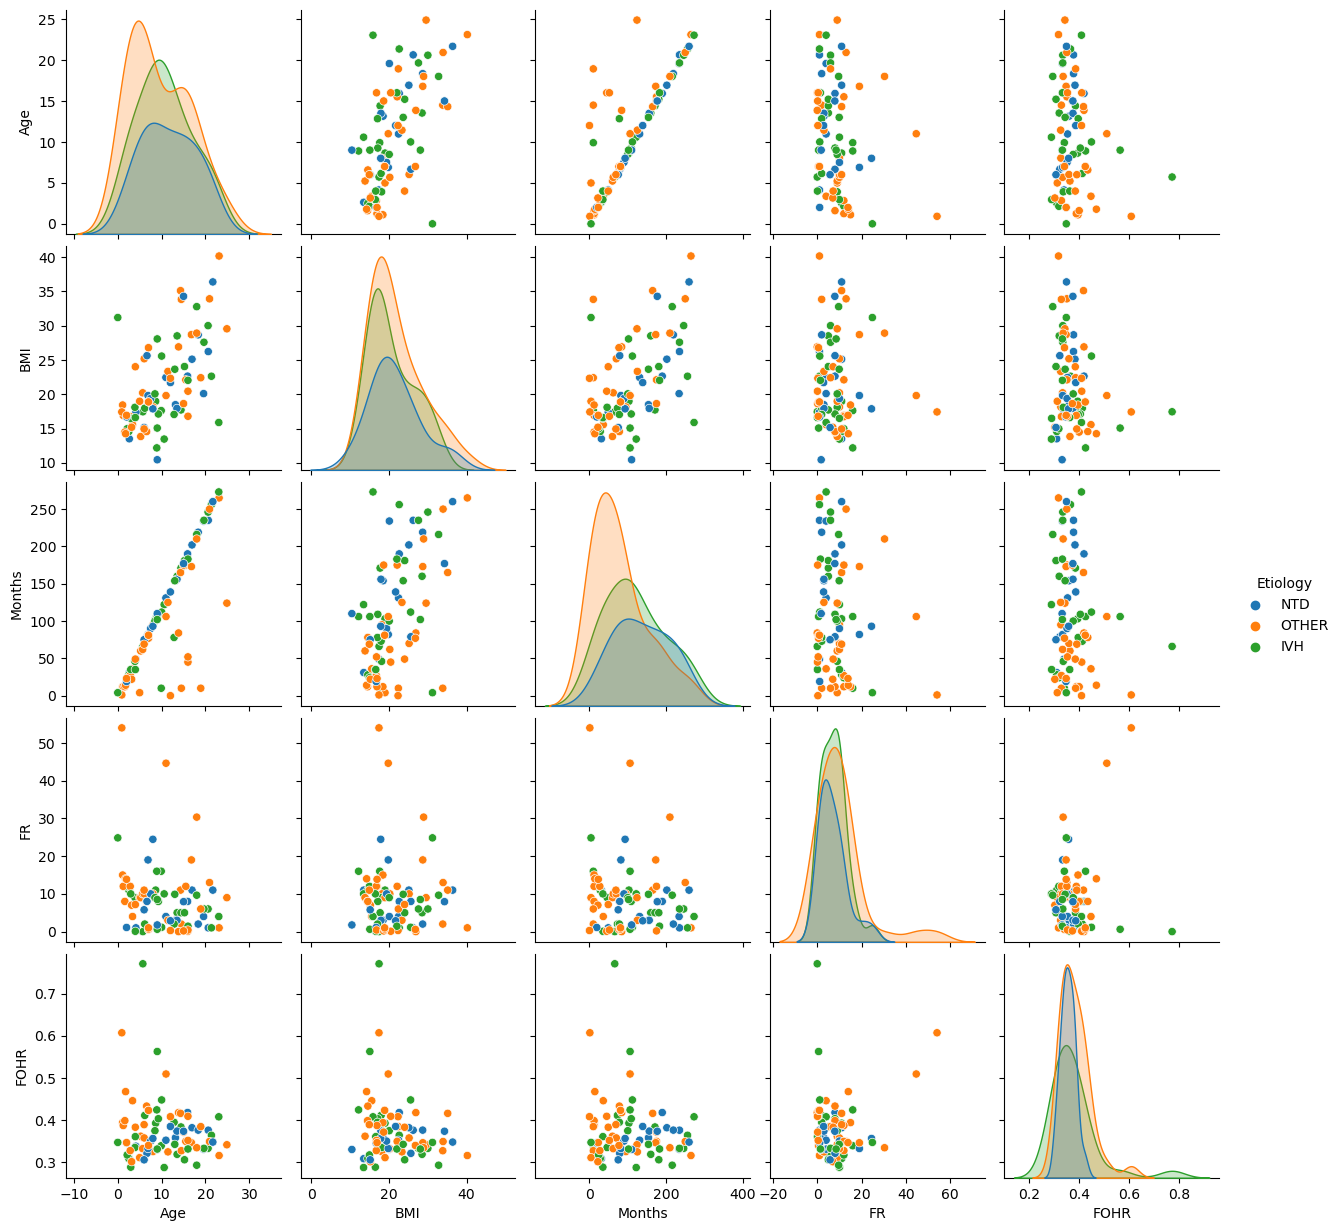

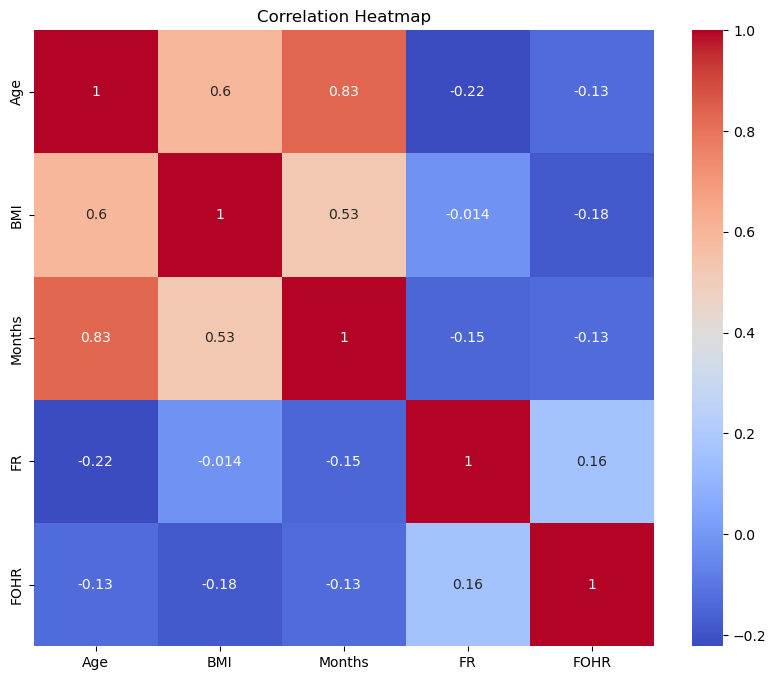

Confusion Matrix:
 [[2 0 2]
 [4 0 1]
 [2 0 6]]

Classification Report:
               precision    recall  f1-score   support

         IVH       0.25      0.50      0.33         4
         NTD       0.00      0.00      0.00         5
       OTHER       0.67      0.75      0.71         8

    accuracy                           0.47        17
   macro avg       0.31      0.42      0.35        17
weighted avg       0.37      0.47      0.41        17



/Users/jacobalhusseini/opt/anaconda3/envs/DataAnalytics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jacobalhusseini/opt/anaconda3/envs/DataAnalytics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jacobalhusseini/opt/anaconda3/envs/DataAnalytics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('DS1.csv')  # Replace 'your_data_file.csv' with your actual data file

# Data exploration and visualization
# Summary statistics
print(data.describe())

# Pairplot for multivariate analysis
sns.pairplot(data, hue='Etiology', diag_kind='kde')
plt.show()

# Correlation heatmap
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Split the data into train and test sets
X = data[['Age', 'BMI', 'Months', 'FR', 'FOHR']]
y = data['Etiology']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit a Generalized Linear Model (GLM)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('DS2.csv')  # Replace 'your_data_file.csv' with your actual data file

# Data exploration and visualization
# Summary statistics
print(data.describe())

# Pairplot for multivariate analysis
sns.pairplot(data, hue='Etiology', diag_kind='kde')
plt.show()

# Correlation heatmap
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Split the data into train and test sets
X = data[['Age', 'Sex', 'Head Size (cm)', 'BMI', 'Time of Day Scanned',
          'Months', 'FR', 'FOHR', 'Current Valve/Setting', '# of past shunt revisions']]
y = data['Etiology']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit a Generalized Linear Model (GLM)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


FileNotFoundError: [Errno 2] No such file or directory: 'DS2.csv'